# Example use of LocalizeSL

First, initialize the environment to load the core files.

In [1]:
    rootdir='~/Dropbox/Code/LocalizeSL';
    addpath(fullfile(rootdir,'MFILES'));

Then, specify the site of interest using the PSMSL ID. See http://www.psmsl.org/data/obtaining/ for an index.

In [2]:
    selectedSite=12;

Load the corefile for the data set of interest. In this case, we will use the corefile containing the DP16 projections from Kopp et al. (2017).

In [3]:
    corefile=load(fullfile(rootdir,'IFILES/SLRProjections170113GRIDDEDcore-DP16-Pl5_15-BC.mat'));
    ccclab='DP16';

Now produce the local projections

In [4]:
    [sampslocrise,sampsloccomponents,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile);
    nameshort=sitenames{1}(1:3);

Region 12 (NEW YORK)- median in rcp85 2100 of 1733.31 mm
Region 12 (NEW YORK)- median in rcp60 2100 of 1153.78 mm
Region 12 (NEW YORK)- median in rcp45 2100 of 1106.77 mm
Region 12 (NEW YORK)- median in rcp26 2100 of 676.26 mm


Generate a time series plot.

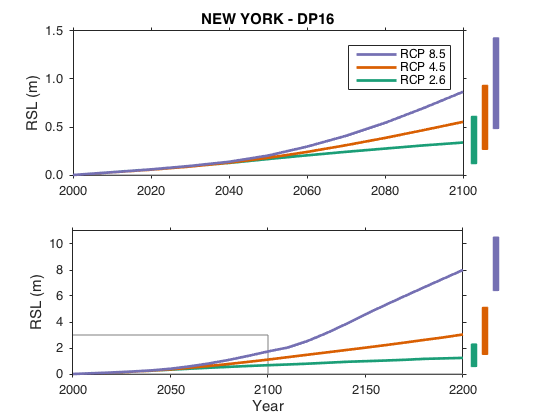

In [5]:
    [hp,hax,hax2]=PlotSLRProjection(sampslocrise,targyears);
    axes(hax(1));
    title([sitenames{1} ' - ' ccclab]);
  

Now let's look at the variance decomposition.

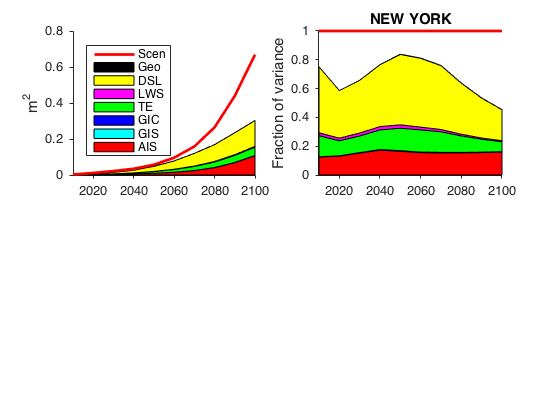

In [7]:
        cols.colIS=[cols.colAIS cols.colGIS];
        cols.colLI=[cols.colIS cols.colGIC];
 
        subcomp={cols.colAIS,cols.colIS,cols.colLI, [cols.colLI cols.colTE], ...
        [cols.colLI cols.colTE cols.colLS], [cols.colLI cols.colTE cols.colLS cols.colOD], ...
        [cols.colLI cols.colTE cols.colLS cols.colOD cols.colGIA]};

        complabls={'AIS','GIS','GIC','TE','LWS','DSL','Geo'};

        [hp,vars,fvars,hlg]=PlotSLRProjectionVariance(sampsloccomponents(:,[1 3 4]),targyears,cols,[2010 2100],1,2,1,subcomp,complabls,'rcbgmykrcbgm');
        title(sitenames{1});

And output several associated tables.

In [ ]:
        % output quantiles of projections

        quantlevs=[.01 .05 .167 .5 .833 .95 .99 .995 .999];
        WriteTableSLRProjection(sampslocrise,quantlevs,siteids,sitenames,targyears,scens,['LSLproj_' ccclab '_' nameshort '_']);

        % output timing of height exceedances
        WriteTableSLRHeightExceedanceTiming(sampslocrise,[],siteids,sitenames,targyears,scens,1,['LSLheights_' ccclab '_' nameshort '_']);

        % output Monte Carlo samples

        WriteTableMC(sampsloccomponents,[],siteids,sitenames,targyears,scens,['LSLproj_MC_' ccclab '_' nameshort '_']);

        % output Monte Carlo samples without background trend,
        % to allow incorporation of alternative estimates of background trend

        WriteTableMC(sampsloccomponents,setdiff(1:size(sampsloccomponents{1},2),cols.colGIA),siteids,sitenames,targyears,scens,['LSLproj_MC_nobkgd_' ccclab '_' nameshort '_']);

        % output decomposition
        WriteTableDecomposition(sampsloccomponents,quantlevs,siteids,sitenames,targyears,cols,scens,['LSLproj_decomp_' ccclab '_' nameshort '_']);